In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
dataX = pd.read_csv('./linearRegressionData/linearX.csv')
dataY = pd.read_csv('./linearRegressionData/lineary.csv')

In [45]:
dataX = dataX.values
dataY = dataY.values
x = dataX.reshape((-1,))
y = dataY.reshape((-1,))

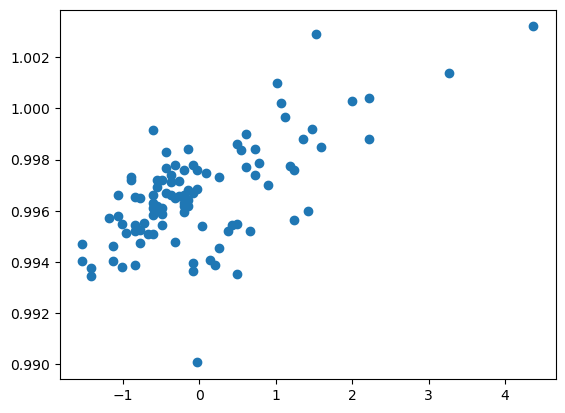

In [52]:
x =(x-x.mean())/x.std()
plt.scatter(x, y)
plt.show()

In [60]:
def hypothesis(x, theta):
    return theta[0] + theta[1]*x

In [62]:
def error(x, y, theta):
    error = 0
    for i in range(x.shape[0]):
        hx =hypothesis(x[i], theta)
        error+= (hx - y[i])**2
    return error

In [64]:
def gradient(x, y, theta):
    grad  = np.zeros((2,))
    for i in range(x.shape[0]):
        hx =hypothesis(x[i], theta)
        grad[0] += (hx - y[i])
        grad[1] += (hx - y[i]) * x[i]
    return grad

In [80]:
def gradientDescent(x, y, learning_ratio = 0.001):
    theta = np.array([-2.0, 0.0])
    max_iteration = 100
    itr = 0
    err_list = []
    theta_list = []
    while(itr <= max_iteration):
        grad = gradient(x, y, theta)
        err_list.append(error(x, y, theta))
        theta_list.append(theta)
        theta[0] -= learning_ratio*grad[0]
        theta[1] -= learning_ratio*grad[1]
        itr+=1
    return theta_list, err_list, theta




In [88]:
theta_list, error_list, theta  = gradientDescent(x, y)

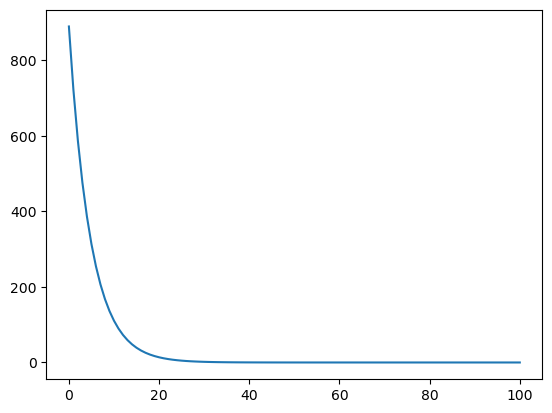

In [90]:
plt.plot(error_list)


In [92]:
print(theta)

[0.996554  0.0013579]


In [96]:
# test data
xtest = np.linspace(-2, 6, 10)
print(xtest)

[-2.         -1.11111111 -0.22222222  0.66666667  1.55555556  2.44444444
  3.33333333  4.22222222  5.11111111  6.        ]


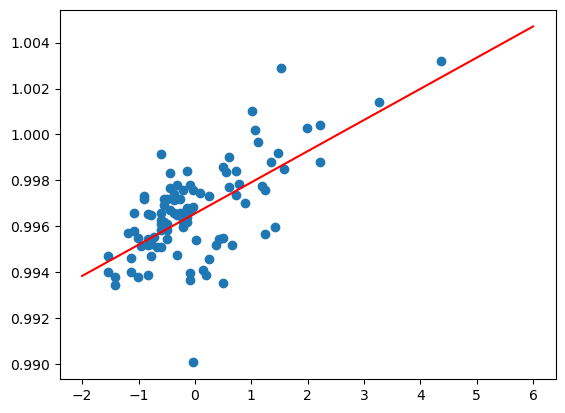

In [100]:
plt.scatter(x, y, label="Training Data")
plt.plot(xtest, hypothesis(xtest, theta), color='red', label='prediction')
plt.show()

# Using Scikit Learn

In [105]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [119]:
# data preparation
dataX = pd.read_csv('./linearRegressionData/linearX.csv')
dataY = pd.read_csv('./linearRegressionData/lineary.csv')
x = dataX.values
y = dataY.values
x = x.reshape((-1,1))
y = y.reshape((-1,1))

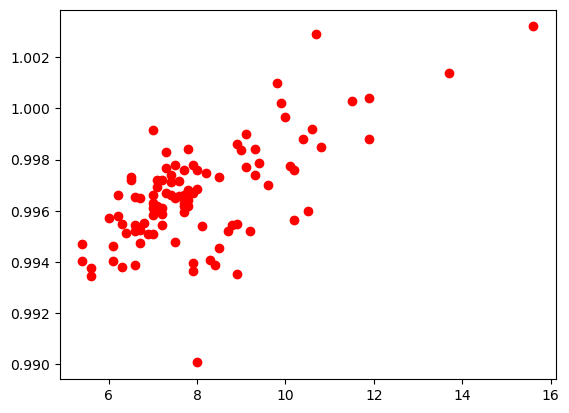

In [115]:
# Ploting
plt.scatter(x, y, color='red')
plt.show()

In [117]:
from sklearn.linear_model import LinearRegression

In [121]:
model = LinearRegression()
# Training
model.fit(x, y)

LinearRegression()

In [137]:
# Prediction
xtest.reshape((-1, 1))
output = model.predict(x)

In [139]:
bias = model.intercept_
coeff = model.coef_
print(bias,  coeff)

[0.9903092] [[0.00078556]]


In [141]:
model.score(x, y)

0.4381850455791949

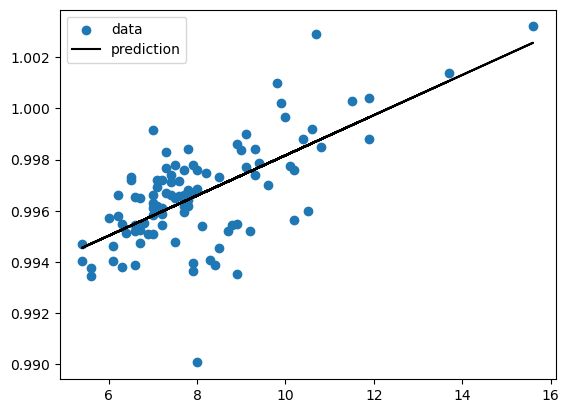

In [143]:
# visualize
plt.scatter(x, y, label='data')
plt.plot(x, output, color='black', label='prediction')
plt.legend()
plt.show()